<a href="https://colab.research.google.com/github/Dobilas/portfolio/blob/main/projektas_kuro_ekonomija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#              Istaigos "X" naudojamu tarnybiniu automobiliu ekonomiskumo apzvalga

#### Pagrindiniai issikeliami klausimai:
##### 1. Ar istaigos "X" tarnybiniai automobiliai yra naudojami ekonomiskai ir koks yra neatitikimas tarp faktiskai sunaudojamu kuro litru ataskaitiniu laikotarpiu ir paskaiciuoto vidurkio?
##### 2. Kurie konkreciai istaigos "X" vairuotojai naudoja automobilius ekonomiskai, o kurie ne?
##### 3. Kokios markes ir modelio tarnybinikai automobiliai yra ekonomiskiausi, o kurie neekonomiskiausi?
##### 4. Koki nuostoli (Eur.) istaiga "X" patiria del kuro suvartojimo neatitikimu?
##### 5. Kaip keistusi istaigos "X" lesos, skiriamos kuro sunaudojimui, brangstant kurui po 0,1 Eur. ir pingant po 0,1 Eur.?
##### 6. Ar istaigos "X" taikomas mokestis 0,55 Eur. uz 1 km. yra ekonomiskas ir, ar pelningas?

In [ ]:
#importavimas biblioteku
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#spalio menesio lentele
spal=pd.read_excel("2022_10.xlsx")
spal=spal.iloc[3:-1].reset_index(drop=True)
spal.drop(columns=spal.columns[0], axis=1, inplace=True)
spal["data"]="2022-10"

In [ ]:
#lapkricio menesio lentele
lap=pd.read_excel("2022_11.xlsx")
lap=lap.iloc[3:-1].reset_index(drop=True)
lap.drop(columns=lap.columns[0], axis=1, inplace=True)
lap["data"]="2022-11"

In [ ]:
#gruodzio menesio lentele
gruod=pd.read_excel("2022_12.xlsx")
gruod=gruod.iloc[3:-1].reset_index(drop=True)
gruod.drop(columns=gruod.columns[0], axis=1, inplace=True)
gruod["data"]="2022-12"

In [ ]:
#bendra lentele uz ataskaitini laikotarpi
bendr=pd.concat([spal, lap, gruod], axis=0)
bendr.columns
stul_pav=["automobilis", "vairuotojas", "rida_pr", "rida_pb", \
          "nuv_ats", "nuv_uzm", "nuv_mst", "kur_kaina", "vid_uzm", "vid_mst", \
          "lik_pr", "prkt_kur", "sun_uzm","sun_mst", "sun_viso", "fakt_sun", "lik_pb","likutis", "data"]
bendr.columns=stul_pav
bendr=bendr.astype({"nuv_ats": 'float64', 'sun_viso': 'float64', 'fakt_sun': 'float64'})
bendr.head()

,automobilis,vairuotojas,rida_pr,rida_pb,nuv_ats,nuv_uzm,nuv_mst,kur_kaina,vid_uzm,vid_mst,lik_pr,prkt_kur,sun_uzm,sun_mst,sun_viso,fakt_sun,lik_pb,likutis,data
0,HYUNDAI i40 ABL555,Mantas Capkauskas,150000,152500,2500.0,200,2300,525,6.2,13.4,40,350,12.4,308.2,320.60,350.0,40,69.4,2022-10
1,ŠKODA OKTAVIA RAK121,Mantas Capkauskas,195030,198730,3700.0,50,3650,502.5,6.6,8.8,20,335,3.3,321.2,324.50,335.0,20,30.5,2022-10
2,CITROEN BERLINGO DAB333,Valdas Skinderis,102500,104800,2300.0,450,1850,360,7.9,9.3,25,240,35.55,172.05,207.60,240.0,25,57.4,2022-10
3,CITROEN BERLINGO ZBL414,Andrius Krasauskas,85900,87800,1900.0,250,1650,285,7.7,9.6,30,190,19.25,158.4,177.65,190.0,30,42.35,2022-10
4,CITROEN BERLINGO JJT100,Rokas Barkauskas,124000,125700,1700.0,680,1020,262.5,7.9,9.4,25,175,53.72,95.88,149.60,175.0,25,50.4,2022-10


In [ ]:
#Automobiliiu identifikacijos isskaidymas i skirtingus stulpelius
bendr[["auto_mark", "auto_mod", "valst_num"]]=bendr["automobilis"].str.split(" ", expand=True)
bendr["aut_modelis_marke"]=bendr["auto_mark"] + " " +  bendr["auto_mod"]

#### Duomenu lenteles apzvalga

In [ ]:
#informacija apie lentele
print(bendr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 19
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   automobilis        60 non-null     object 
 1   vairuotojas        60 non-null     object 
 2   rida_pr            60 non-null     object 
 3   rida_pb            60 non-null     object 
 4   nuv_ats            60 non-null     float64
 5   nuv_uzm            60 non-null     object 
 6   nuv_mst            60 non-null     object 
 7   kur_kaina          60 non-null     object 
 8   vid_uzm            60 non-null     object 
 9   vid_mst            60 non-null     object 
 10  lik_pr             60 non-null     object 
 11  prkt_kur           60 non-null     object 
 12  sun_uzm            60 non-null     object 
 13  sun_mst            60 non-null     object 
 14  sun_viso           60 non-null     float64
 15  fakt_sun           60 non-null     float64
 16  lik_pb             60 non-nu

In [ ]:
#lenteles dydis
print(bendr.shape)

(60, 23)


In [ ]:
#nulines reiksmes
bendr.isnull().values.any()

False

# Analizė

#### 1. Ar istaigos "X" tarnybiniai automobiliai yra naudojami ekonomiskai ir koks yra neatitikimas tarp faktiskai sunaudojamu kuro litru ataskaitiniu laikotarpiu ir paskaiciuoto vidurkio?

In [ ]:
kur_skirt=bendr[["vairuotojas", "nuv_ats","sun_viso","fakt_sun", "data"]].copy()
kur_skirt["skirt_kuro"]=abs(bendr["sun_viso"]-bendr["fakt_sun"])
kur_skirt[["vairuotojas", "nuv_ats","sun_viso","fakt_sun", "skirt_kuro", "data"]]
kur_skirt["neat_proc"]=kur_skirt["skirt_kuro"] / kur_skirt["sun_viso"] * 100
print("bendras kuro neatitikimas-", round(kur_skirt["skirt_kuro"].sum(), 2),"litrai")
print("vidutinis kuro neatitikimas kiekvienam vairuotojui nuo normu-",round(kur_skirt["skirt_kuro"].mean(), 2))
print("procentinis kuro neatitikimas nuo normu-",round(kur_skirt["neat_proc"].mean(), 2))
kur_pgl_dt=abs(kur_skirt.groupby("data").skirt_kuro.sum())
kur_pgl_dt

bendras kuro neatitikimas- 1189.8 litrai
vidutinis kuro neatitikimas kiekvienam vairuotojui nuo normu- 19.83
procentinis kuro neatitikimas nuo normu- 12.07


data
2022-10    329.04
2022-11    354.85
2022-12    505.91
Name: skirt_kuro, dtype: float64

<AxesSubplot:xlabel='data'>

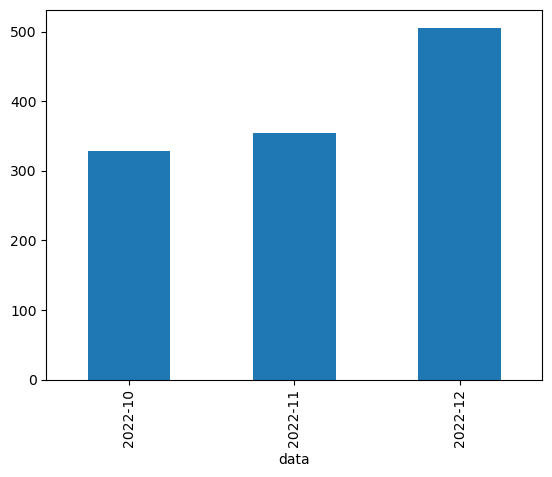

In [ ]:
#lentele, skirta atvaizduoti, kokie kuro neatitikimai buvo kiekviena menesi.
kur_pgl_dt.plot.bar()

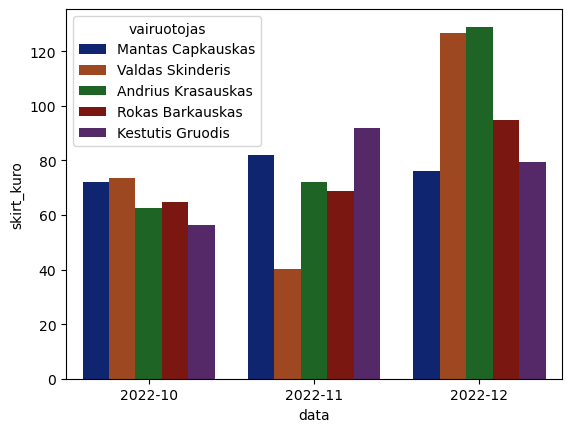

In [ ]:
sns.barplot(x = 'data',
            y = 'skirt_kuro',
            hue = 'vairuotojas',
            data = kur_skirt,
            palette="dark",
            estimator=sum,
            ci = 0)
plt.show()

### 1. Isvados : 
#### Istaigos "X" spalio-gruodzio menesiais (ataskaitinis laikotarpis) bendras faktinis kuro sunaudojimas buvo 1189.8 litrais didesnis nei numatytas sunaudojimo vidurkis, taigi darytina isvada, jog automobiliai nera naudojami ekonomiskai. Detalizuojant, spalio menesi virsytas limitas buvo 329.04 litro, lapkricio menesi 354.85 litro, gruodzio menesi 505.91 litro. Vidutiniskai kiekvienam automobiliui virsytas kuro kiekis per visa ataskaitini laikotarpi sieke apie 19.83 litro arba 12.07 proc. numatyto limito. Ivertinus didejanti kuro limito virsijima kiekviena menesi, darytina prielaida, jog vestant oro temperaturai yra sunaudojama vis daugiau litru kuro.

#### 2. Kurie konkreciai istaigos "X" vairuotojai naudoja automobilius ekonomiskai, o kurie ne?

In [ ]:
vair_neat=bendr.groupby(["vairuotojas", "data"])["sun_viso", "fakt_sun"].agg({"sun_viso":"sum", "fakt_sun": "sum"}).reset_index()
vair_neat["neatitikimas"]=vair_neat["sun_viso"] - vair_neat["fakt_sun"]
sugrup_vair=vair_neat.groupby(["vairuotojas"])["neatitikimas"].sum().sort_values(ascending=True)
print(sugrup_vair)
print("kuro neatitikimo vidurkis per ataskaitini laikotarpi - ", round(vair_neat.groupby(["vairuotojas"])["neatitikimas"].sum().sort_values(ascending=True).mean(), 2))

vairuotojas
Andrius Krasauskas   -263.92
Valdas Skinderis     -240.12
Mantas Capkauskas    -230.01
Rokas Barkauskas     -228.09
Kestutis Gruodis     -227.66
Name: neatitikimas, dtype: float64
kuro neatitikimo vidurkis per ataskaitini laikotarpi -  -237.96


/var/folders/74/9nz61mvd2f34fbpfyvkfgb540000gp/T/ipykernel_25324/3590515813.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vair_neat=bendr.groupby(["vairuotojas", "data"])["sun_viso", "fakt_sun"].agg({"sun_viso":"sum", "fakt_sun": "sum"}).reset_index()


[None, None, None, None, None, None, None, None, None, None]

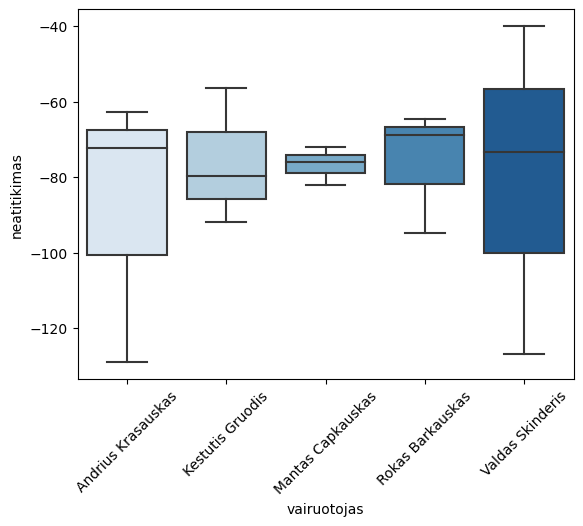

In [ ]:
ax=sns.boxplot(x = vair_neat["vairuotojas"], y=vair_neat["neatitikimas"], palette="Blues");
plt.setp(ax.get_xticklabels(), rotation=45)

### 2. Isvados: 
#### Atlikus analize paaiskejo, jog istaigoje "X" dirba 5 darbuotojai, kuriems yra priskirti automobiliai. Sie vairuotojai per ataskaitini laikotarpi automobilius naudojo neekonomiskai arba automobiliai del savo netinkamos bukles eikvojo daugiau kuro. Didziausias neatitikimas buvo Andriaus Krasausko vairuojamuose automobiliuose - 263.92 l. (spalio men. 62.68 l., lapkricio men. 72.26 l., gruodzio men. 128.98 l.). Didziausias ir rizikingiausias kuro limito virsijimas pasiektas gruodzio men ir butu galima detaliau analizuoti si rodikli vertinant finansinius dokumentus. Maziausias kuro limito virsijimas Kestucio Gruodzio - 227.66 l. (spalio men. 56.26 l., lapkriti 91.82 l., gruodi 79.58 l.), taciau kadangi bendras vairuotoju kuro neatitikimo vidurkis siekia apie 237.96 l. (spali 65.81 l., lapkriti 70.97 l., 101.18 l.) per ataskaitini laikotarpi, todel vertinti, jog kuris nors vairuotojas vairuoja ypatingai isskirtinai neekonomiskai nera galimybes.

#### 3. Kokios markes ir modelio tarnybinikai automobiliai yra ekonomiskiausi, o kurie neekonomiskiausi?

In [ ]:
mark=bendr[["vairuotojas", "nuv_ats","sun_viso","fakt_sun","auto_mark", "aut_modelis_marke"]]
mark1=mark.groupby("auto_mark").sun_viso.sum()
mark2=mark.groupby("auto_mark").fakt_sun.sum()
mark_sk=abs(mark1-mark2)
mark_sk.sort_values(ascending=True)

auto_mark
HYUNDAI     42.60
ŠKODA       90.78
CITROEN    463.58
VW         592.84
dtype: float64

<AxesSubplot:xlabel='auto_mark'>

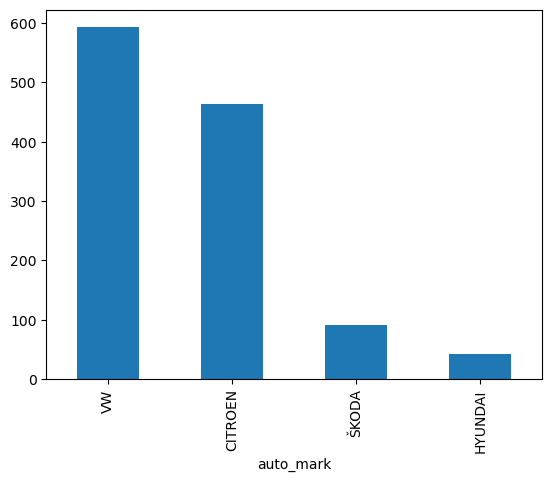

In [ ]:
#lentele, atvaizduojanti tarnybiniu automobiliu konkreciu markiu kuro limitu virsijima ataskaitiniu laik. 
mark_sk.sort_values(ascending=False).plot.bar()

In [ ]:
mark_mod=bendr[["vairuotojas", "nuv_ats","sun_viso","fakt_sun","auto_mark", "aut_modelis_marke"]]
mark_mod1=mark_mod.groupby("aut_modelis_marke").sun_viso.sum()
mark_mod2=mark_mod.groupby("aut_modelis_marke").fakt_sun.sum()
mark_mod_sk=abs(mark_mod1-mark_mod2)
mark_mod_sk.sort_values(ascending=True)

aut_modelis_marke
ŠKODA OKTAVIA        30.50
HYUNDAI i40          42.60
VW PASSAT            43.60
ŠKODA Fabia          60.28
VW TRANSPORTER       63.47
CITROEN BERLINGO    463.58
VW CADDY            485.77
dtype: float64

<AxesSubplot:xlabel='aut_modelis_marke'>

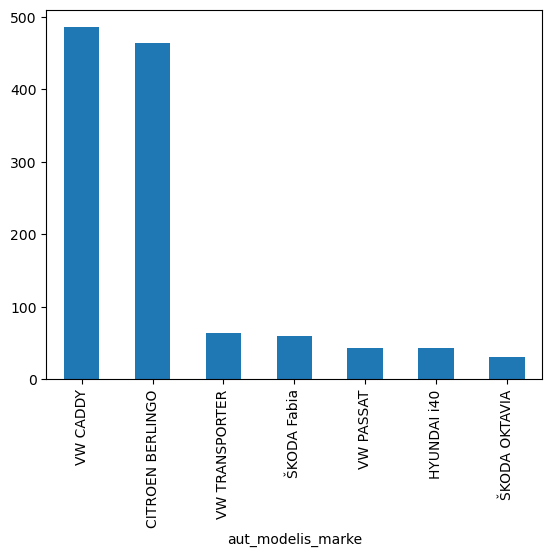

In [ ]:
#lentele, atvaizduojanti tarnybiniu automobiliu konkreciu markiu kuro limitu virsijima ataskaitiniu laik. 
mark_mod_sk.sort_values(ascending=False).plot.bar()

### 3. Isvados:

#### Jeigu darytume prielaida, jog visi vairuotojai vairuoja ekonomiskai, tuomet darytina isvada, jog bendrai "VW" markes automobiliai yra neekonomiskiausi (592.84 l. skirtumas nuo kuro limitu per atask. laik.) bei konkreciau "VW Caddy" modelio automobiliai yra patys neekonomiskiausi (485.77 l. skirtumas nuo kuro limitu per atask. laik.). Ekonomiskiausi yra "Hyundai" markes automobiliai (42.6 l. skirtumas nuo kuro limitu per atask. laik.), o vertinant automobilio modeli, darytina isvada, jog "Skoda Octavia" automobiliai yra ekonomiskiausi (30.5 l. skirtumas nuo kurio limitu per atask. laik.).Taip pat istaigai "X" atnaujinant automobiliu parka, tikslinga atsizvelgti i siuos analizes duomenis ir vykdyti automobiliu pirkimus pagal minima ekonomiskuma.

#### 4. Koki nuostoli (Eur.) istaiga "X" patiria del kuro suvartojimo neatitikimu?

In [ ]:
kuro_kaina = 1.5

In [ ]:
lesos=bendr[["vairuotojas", "nuv_ats","sun_viso","fakt_sun"]].copy()
lesos["skirt_kuro"]=lesos["sun_viso"] - lesos["fakt_sun"]
lesos["neat_proc"]=lesos["skirt_kuro"] / lesos["sun_viso"] * 100
lesos["skirt_vert"]=abs(lesos["skirt_kuro"]) * kuro_kaina
neat_eur=round(lesos.skirt_vert.sum(), 2)
prog_met_nuost=round(lesos.skirt_vert.sum() * 4, 2)
print("istaigos patirtas nuostolis - ", neat_eur, "prognozuojamas metinis nuostolis - ", prog_met_nuost)

istaigos patirtas nuostolis -  1784.7 prognozuojamas metinis nuostolis -  7138.8


### 4. Isvados: 
#### Per 2022 metu ketvirta ketvirti (ataskaitini laikotarpi) istaiga "X" kaip nuostoli patyre 1784.7 Eur., kadangi buvo virsytos planuojamos lesos kuro sunaudojimui sia auksciau minima suma. Taip pat prognozuojant lesas ateinantiems metams, reiktu nusimatyti galima kuro sunaudojimo nuostoli (pervirsi), kuris apytikslaii gali siekti 7138,8 Eur.

#### 5. Kaip keistusi istaigos "X" lesos, skiriamos kuro sunaudojimui, brangstant kurui po 0,1 Eur. ir pingant po 0,1 Eur.?

In [ ]:
lesos=bendr[["vairuotojas", "nuv_ats","sun_viso","fakt_sun"]].copy()
lesos["lesos_kurui"]=lesos["fakt_sun"] * kuro_kaina
lesos["lesos_kurui + 0.1Eur."]=lesos["fakt_sun"] * (kuro_kaina + 0.1)
lesos["lesos_kurui + 0.2Eur."]=lesos["fakt_sun"] * (kuro_kaina + 0.2)
lesos["lesos_kurui + 0.3Eur."]=lesos["fakt_sun"] * (kuro_kaina + 0.3)
lesos["lesos_kurui + 0.4Eur."]=lesos["fakt_sun"] * (kuro_kaina + 0.4)
lesos["lesos_kurui - 0.1Eur."]=lesos["fakt_sun"] * (kuro_kaina - 0.1)
lesos["lesos_kurui - 0.2Eur."]=lesos["fakt_sun"] * (kuro_kaina - 0.2)
lesos["lesos_kurui - 0.3Eur."]=lesos["fakt_sun"] * (kuro_kaina - 0.3)
lesos["lesos_kurui - 0.4Eur."]=lesos["fakt_sun"] * (kuro_kaina - 0.4)
skirt=lesos[["lesos_kurui", "lesos_kurui + 0.1Eur.", "lesos_kurui + 0.2Eur.",\
             "lesos_kurui + 0.3Eur.", "lesos_kurui + 0.4Eur.", "lesos_kurui - 0.1Eur.", \
             "lesos_kurui - 0.2Eur.", "lesos_kurui - 0.3Eur.", "lesos_kurui - 0.4Eur."]].sum()
skirt

lesos_kurui              19869.0
lesos_kurui + 0.1Eur.    21193.6
lesos_kurui + 0.2Eur.    22518.2
lesos_kurui + 0.3Eur.    23842.8
lesos_kurui + 0.4Eur.    25167.4
lesos_kurui - 0.1Eur.    18544.4
lesos_kurui - 0.2Eur.    17219.8
lesos_kurui - 0.3Eur.    15895.2
lesos_kurui - 0.4Eur.    14570.6
dtype: float64

<AxesSubplot:>

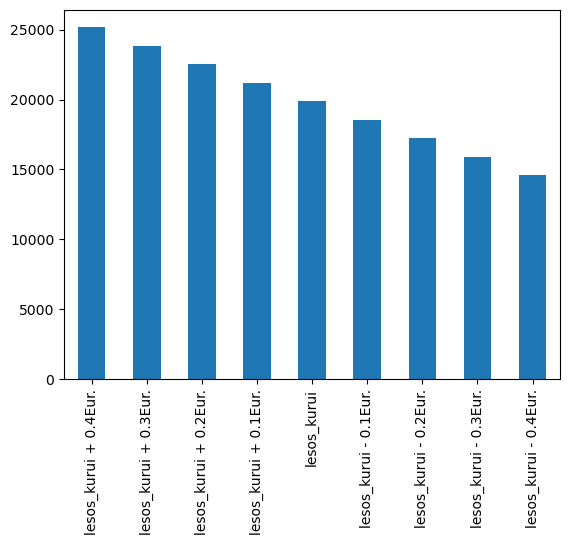

In [ ]:
skirt.sort_values(ascending=False).plot.bar()

### 5. Isvados : 

#### Atlikus kuro kainos prognozuojamo pokycio analize, nustatyta, jog pagal turimus ketvircio duomenis, uz ataskaitini laikotarpi istaiga "X" bendrai sumokejo uz kuro sunaudojima - 19 869 Eur. Su salyga, jeigu kuras brangtu 0.1 Eur., istaiga "X' tuomet sumoketu 21 193.6 Eur., 0.2 Eur. - 22 518.2 Eur., 0.3 Eur. 23 842.8 Eur. Jeigu kuras pigtu atitinkamai 0.1 Eur. istaiga "X" sumoketu 18 544.4 Eur., 0.2  Eur. - 17 219.8 Eur., 0.3 Eur. - 15 895.2 Eur.

#### 6. Ar istaigos "X" taikomas mokestis 0,55 Eur. uz 1 km. yra ekonomiskas ir, ar pelningas?

In [ ]:
sun_bend_l=bendr.fakt_sun.sum()
sun_b_eur=sun_bend_l * kuro_kaina
nuvaz_km=bendr.nuv_ats.sum()
taik_mok=0.55
fakt_1_km=round((sun_b_eur/nuvaz_km), 2)
proc_pel=round(taik_mok/fakt_1_km * 100, 2)
print("taikomas mokestis uz nuvaziuota 1 km - ", taik_mok, "savikaina 1 km - ", fakt_1_km, "pelnas procentais -", proc_pel)

taikomas mokestis uz nuvaziuota 1 km -  0.55 savikaina 1 km -  0.16 pelnas procentais - 343.75


### 6. Isvados:
#### Isanalizavus, ar istaigos "X" taikomas tarifas 0.55 Eur. uz 1 km. suteiktos paslaugos yra ekonomiskas ir pelningas, nustatyta, jog istaigos "X" savikaina 1 km. yra 0.16 Eur. Taigi nevertinant automobiliu amortizacijos, darbuotoju uzdarbio ir kt. kastu, taikomas mokestis, kuris virsija 0.16 Eur., yra pelningas. Siuo metu istaigos "X" taikomo 0.55 Eur. mokescio pelningumas yra apie 343.75 proc. 

# ACIU UZ DEMESI